# Ford GoBike Exploration


### by Lanre Tiamiyu

## Investigation Overview


> In this analysis, I would like to figure out the average duration of a trip and how it is affected by the other features. Also, we need to describe when most trips are taken.


## Dataset Overview

> The data originally had 183412 entries with 16 features. Null values and irresonable data were removed and new features were added to have an updated 171234 entries in the dataset with 20 features; some are numerical and some are categorical and 2 are datetime. The data represents the rides during February of 2019.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# Data Wrangling
#Here is a summary of my data cleaning process

#Removed entries with missing values
#Converted the time column to DateTime and extracted the hour, day, month and year columns
#Converted each feature to the appropriate data type 

# load in the dataset into a pandas dataframe
df = pd.read_csv('fordgobike_clean.csv')

## Plot 1: Ride Frequency by days

> We can see that there is a pattern that rides tend to decrease in weekends. This suggests that most of the rides are used to go and from work.

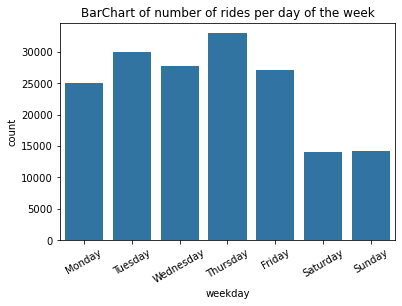

In [4]:
base_color=sb.color_palette()[0]
order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sb.countplot(data=df, x='weekday', color=base_color, order=order)
plt.title('BarChart of number of rides per day of the week')
plt.xticks(rotation=30);

## (Plot 2: Ride Frequency by hours)

> We can clearly see that the distribution is bimodal, the higher ride frequencies for morning (8th and 9th hours) and evening (17th and 18th hours) which adds more strength to the idea that the rides are mainly used to go to and from work.

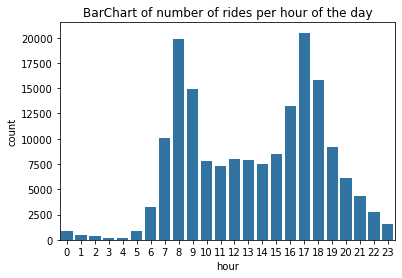

In [5]:
sb.countplot(data=df, x='hour',color=base_color)
plt.title('BarChart of number of rides per hour of the day');

## (Plot 3: Ride duration by days)

> We can see that the duration distribution is some how similar across the weekdays, with a slight more variance in the weekends.


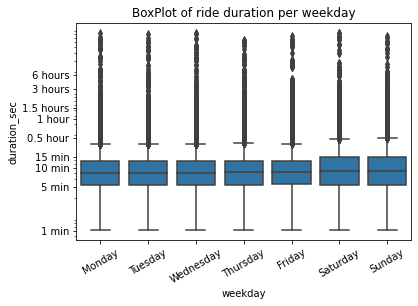

In [6]:
sb.boxplot(x=df['weekday'], y=df['duration_sec'],color=base_color,order=order)
plt.yscale('log')
tick_locs = [60,300,600,900,1800,3600,5400,10800,18000]
tick_names=['1 min','5 min','10 min','15 min','0.5 hour','1 hour','1.5 hours','3 hours','6 hours']
plt.yticks(tick_locs, tick_names)
plt.title('BoxPlot of ride duration per weekday')
plt.xticks(rotation=30);

## (Plot 4: Ride duration by user type)

> We can see that subscribers tend to have less average ride times compared to normal customers. It seems that most of the subscribers are using the system to go to and from work, with the same round trip time every day.

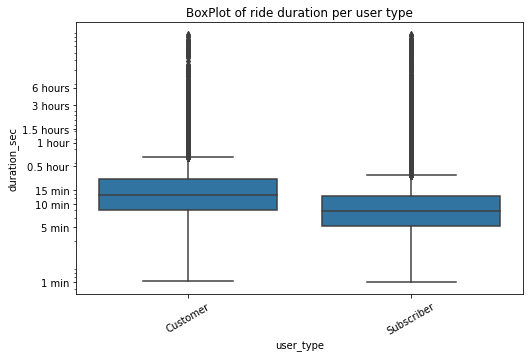

In [7]:
plt.figure(figsize=(8,5))
sb.boxplot(x=df['user_type'], y=df['duration_sec'],color=base_color)
plt.yscale('log')
tick_locs = [60,300,600,900,1800,3600,5400,10800,18000]
tick_names=['1 min','5 min','10 min','15 min','0.5 hour','1 hour','1.5 hours','3 hours','6 hours']
plt.title('BoxPlot of ride duration per user type');
plt.yticks(tick_locs, tick_names)
plt.xticks(rotation=30);

## (Plot 5: User type vs bike sharing for trips)

> It seems there is the same ratio of rides between genders during all the days. It also looks like all participants in this option are only subscribers.

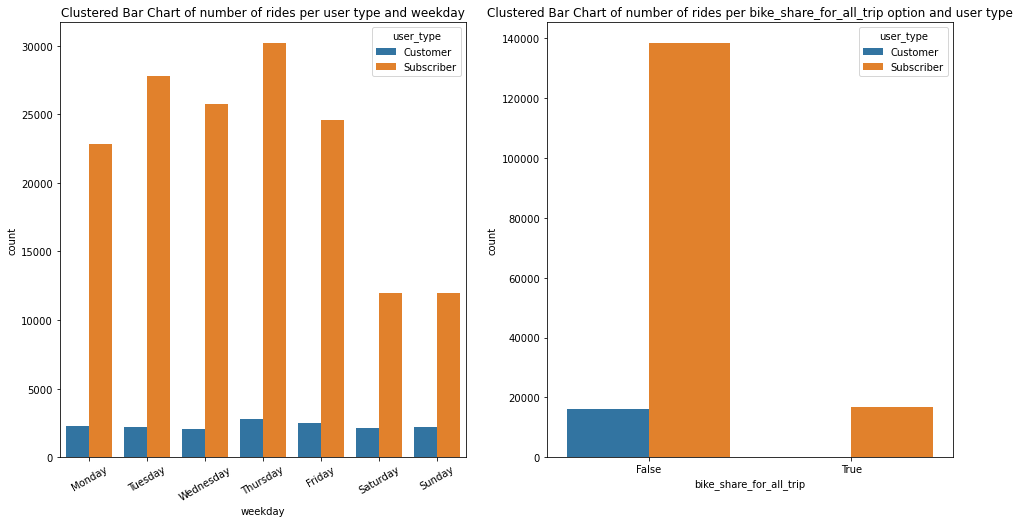

In [8]:
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
sb.countplot(data = df, x = 'weekday', hue = 'user_type',order=order)
plt.title('Clustered Bar Chart of number of rides per user type and weekday')
plt.xticks(rotation=30);
plt.subplot(1, 2, 2)
sb.countplot(data = df, x = 'bike_share_for_all_trip', hue = 'user_type')
plt.title('Clustered Bar Chart of number of rides per bike_share_for_all_trip option and user type');

## (Plot 6: Ride duration by age and user type)

> We can see that casual customers tend to have less variance in ride duration with age compared to subscribers and also more average ride duration.

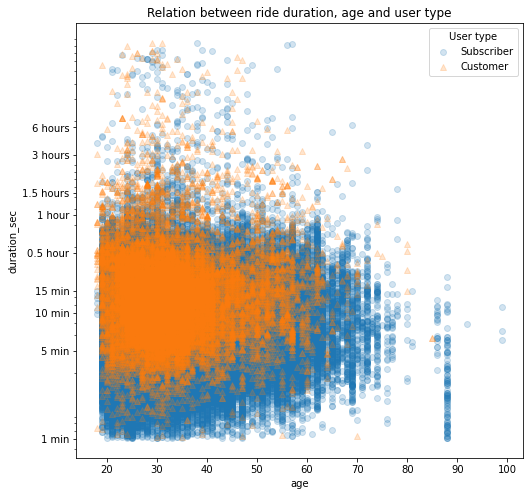

In [9]:
plt.figure(figsize=(8,8))
ttype_markers=[['Subscriber','o'],['Customer','^']]
plt.title('Relation between ride duration, age and user type')
for ttype,marker in ttype_markers:
    plot_data=df.loc[df['user_type']==ttype]
    sb.regplot(data=plot_data,x='age',y='duration_sec',fit_reg=False,marker=marker,scatter_kws={'alpha':1/5})
    plt.yscale('log')
    tick_locs = [60,300,600,900,1800,3600,5400,10800,18000]
    tick_names=['1 min','5 min','10 min','15 min','0.5 hour','1 hour','1.5 hours','3 hours','6 hours']
    plt.yticks(tick_locs, tick_names)
plt.legend(['Subscriber','Customer'],title='User type');

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert ford-gobike-dataset-exploration-slides.ipynb --to slides --post serve --no-input --no-prompt

### Key Insights

- The higher ride frequencies for the morning (8th and 9th hrs) and evening (17th and 18th hrs) can be linked to rush hours where people leave for work and come back later in the evening.
- Weekend trips take a longer duration as compared to trips taken during the week.
- Customer user type trips take a longer duration compared to subscriber user type.
- Weekend trips take a longer duration as compared to trips taken during the week.